In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector,Operator,DensityMatrix
from qiskit.visualization import plot_bloch_multivector,plot_histogram
from qiskit.primitives import Sampler

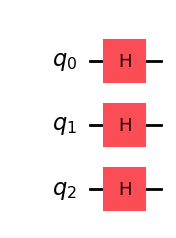

In [2]:
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.draw('mpl')


In [3]:
marked_state = Statevector.from_label('101')

In [4]:
initial_superposition_state = Statevector.from_instruction(qc)
initial_superposition_state.draw('latex')

<IPython.core.display.Latex object>

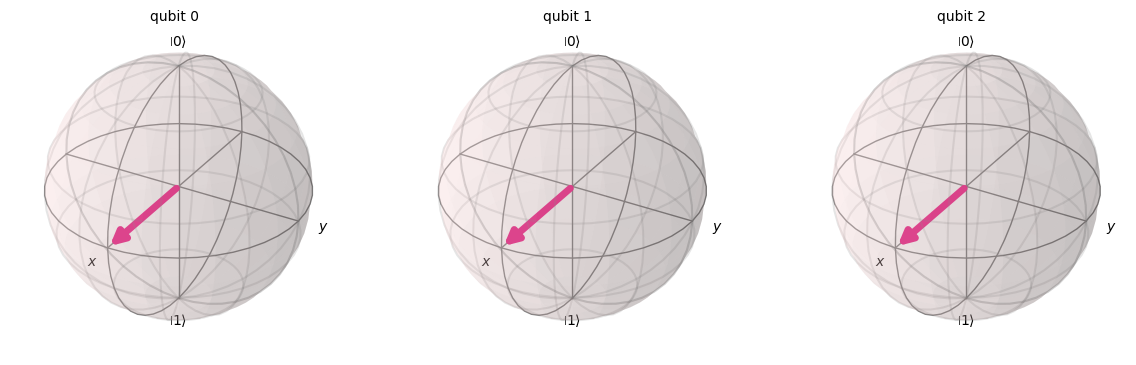

In [5]:
plot_bloch_multivector(initial_superposition_state)

In [6]:
grover_oracle = Operator.from_label('III') - 2* DensityMatrix(marked_state)
grover_oracle.draw('latex')

<IPython.core.display.Latex object>

In [7]:
grover_diffusion_op = 2*DensityMatrix(initial_superposition_state) - Operator.from_label('III')
grover_diffusion_op.draw('latex')

<IPython.core.display.Latex object>

In [8]:
qc.unitary(grover_oracle,[0,1,2],'Oracle')
# qc.draw('mpl')

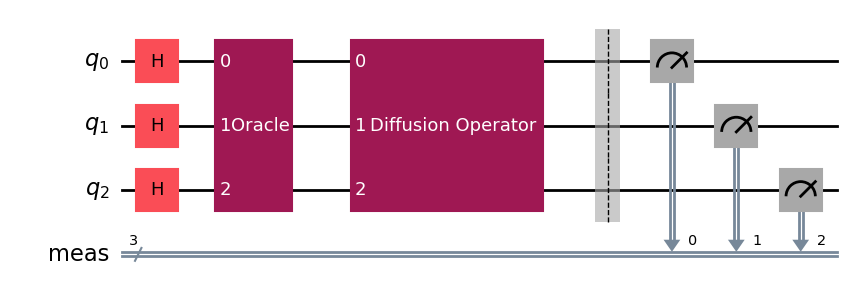

In [9]:
qc.unitary(grover_diffusion_op,[0,1,2],'Diffusion Operator')
qc.measure_all()
qc.draw('mpl')

In [10]:

sampler = Sampler()
job = sampler.run(qc)
counts = job.result().quasi_dists[0]


def binary_counts(counts:dict,num_qubits:int):
    bindigits = 2 ** num_qubits
    bin_counts = {f"{key:0{num_qubits}b}" : value for key , value in counts.items()}
    return bin_counts

bin_counts = binary_counts(counts,3)

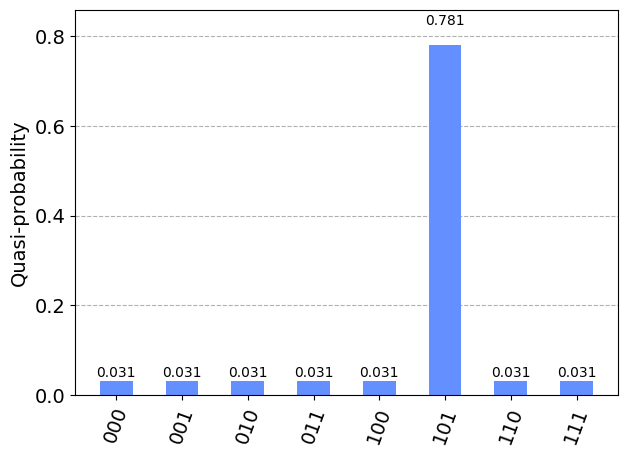

In [11]:
plot_histogram(bin_counts)

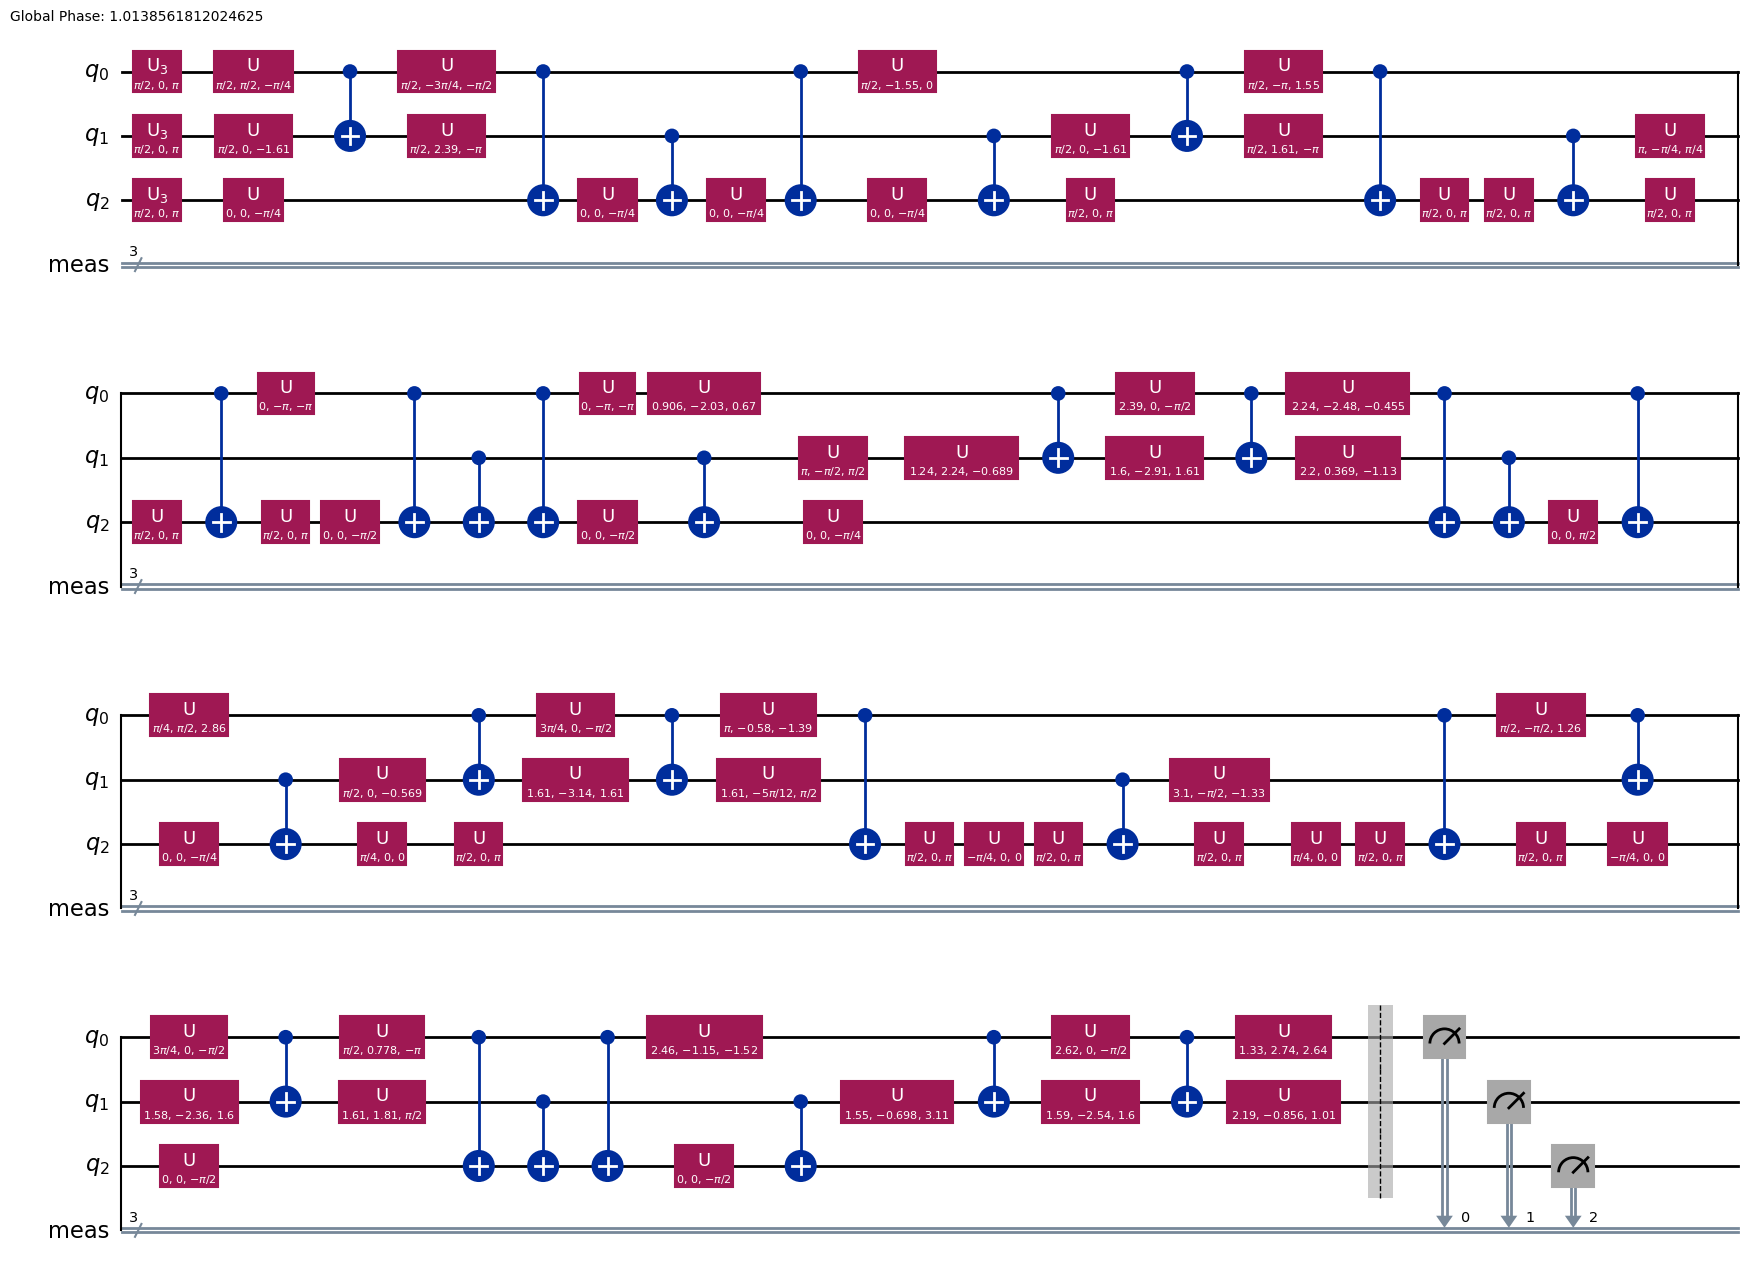

In [12]:
qc.decompose(reps=2).draw('mpl')

In [13]:
qc.decompose(reps=5).depth()

70

In [14]:
get_counts = qc.decompose(reps=3).count_ops()
cnot_count = get_counts.get('cx',0)
print(cnot_count)

32


In [15]:
get_counts = qc.decompose(reps=3).count_ops()
u_count = get_counts.get('u',0)
print(u_count)

66
